In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import statsmodels.formula.api as smf
import statsmodels.api as sm 

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error

In [2]:
bikedata = pd.read_csv("day.csv")

In [3]:
bike = bikedata.copy()

In [4]:
bike

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [5]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
bike.duplicated().sum()

0

# EDA

In [7]:
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

as instant is not giving any information to us so we will delete the instant column

In [8]:
bike.drop("instant" , axis = 1 , inplace= True)

as datatype of dteday is object so we will covert it into datetime

In [9]:
bike["dteday"] = pd.to_datetime(bike["dteday"])

In [10]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      730 non-null    datetime64[ns]
 1   season      730 non-null    int64         
 2   yr          730 non-null    int64         
 3   mnth        730 non-null    int64         
 4   holiday     730 non-null    int64         
 5   weekday     730 non-null    int64         
 6   workingday  730 non-null    int64         
 7   weathersit  730 non-null    int64         
 8   temp        730 non-null    float64       
 9   atemp       730 non-null    float64       
 10  hum         730 non-null    float64       
 11  windspeed   730 non-null    float64       
 12  casual      730 non-null    int64         
 13  registered  730 non-null    int64         
 14  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(10)
memory usage: 85.7 KB


In [11]:
bike['season'].replace({1:"spring",2:"summer",3:"fall",4:"winter"},inplace=True)
bike.head(10)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2018-01-01,spring,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2018-02-01,spring,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,2018-03-01,spring,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,2018-04-01,spring,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,2018-05-01,spring,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,2018-06-01,spring,0,1,0,6,0,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,2018-07-01,spring,0,1,0,0,0,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,2018-08-01,spring,0,1,0,1,1,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,2018-09-01,spring,0,1,0,2,1,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,2018-10-01,spring,0,1,0,3,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [12]:
bike['weathersit'].replace({1:"Clear_Few Clouds",2:"Mist_cloudy",3:"Light rain_Light snow_Thunderstorm",4:'Heavy Rain_Ice Pallets_Thunderstorm_Mist'},inplace=True)
bike.head(10)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2018-01-01,spring,0,1,0,1,1,Mist_cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2018-02-01,spring,0,1,0,2,1,Mist_cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,2018-03-01,spring,0,1,0,3,1,Clear_Few Clouds,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,2018-04-01,spring,0,1,0,4,1,Clear_Few Clouds,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,2018-05-01,spring,0,1,0,5,1,Clear_Few Clouds,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,2018-06-01,spring,0,1,0,6,0,Clear_Few Clouds,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,2018-07-01,spring,0,1,0,0,0,Mist_cloudy,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,2018-08-01,spring,0,1,0,1,1,Mist_cloudy,6.765000,8.11270,53.5833,17.875868,68,891,959
8,2018-09-01,spring,0,1,0,2,1,Clear_Few Clouds,5.671653,5.80875,43.4167,24.250650,54,768,822
9,2018-10-01,spring,0,1,0,3,1,Clear_Few Clouds,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [13]:
bike['weekday'].replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"},inplace=True)
bike.head(10)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2018-01-01,spring,0,1,0,Monday,1,Mist_cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2018-02-01,spring,0,1,0,Tuesday,1,Mist_cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,2018-03-01,spring,0,1,0,Wednesday,1,Clear_Few Clouds,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,2018-04-01,spring,0,1,0,Thursday,1,Clear_Few Clouds,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,2018-05-01,spring,0,1,0,Friday,1,Clear_Few Clouds,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,2018-06-01,spring,0,1,0,Saturday,0,Clear_Few Clouds,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,2018-07-01,spring,0,1,0,Sunday,0,Mist_cloudy,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,2018-08-01,spring,0,1,0,Monday,1,Mist_cloudy,6.765000,8.11270,53.5833,17.875868,68,891,959
8,2018-09-01,spring,0,1,0,Tuesday,1,Clear_Few Clouds,5.671653,5.80875,43.4167,24.250650,54,768,822
9,2018-10-01,spring,0,1,0,Wednesday,1,Clear_Few Clouds,6.184153,7.54440,48.2917,14.958889,41,1280,1321


<AxesSubplot:>

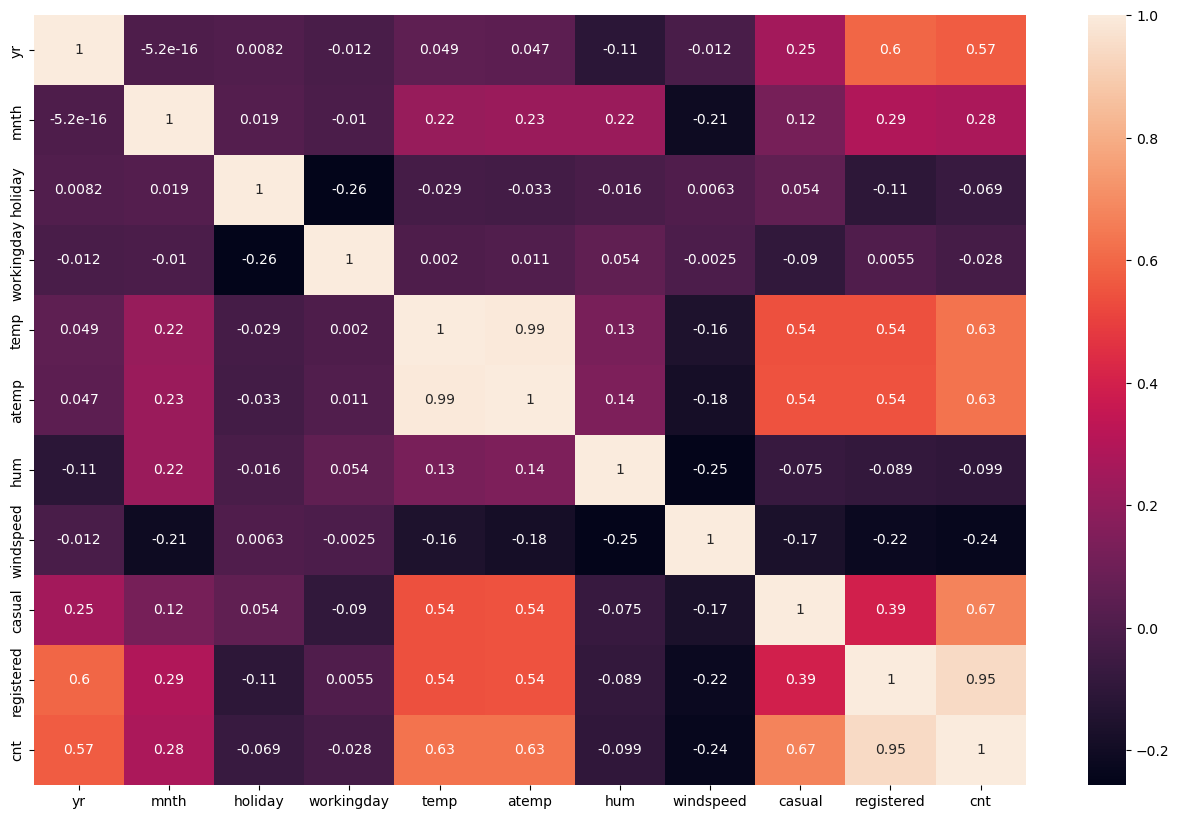

In [14]:
ax = plt.subplots(figsize=(16,10))  
sns.heatmap(data= bike.corr() , annot= True)

Here we can say that holiday, weekday, workingday, hum are not showing the relationship to the cnt.
we will crossvalidate it 

<AxesSubplot:xlabel='cnt'>

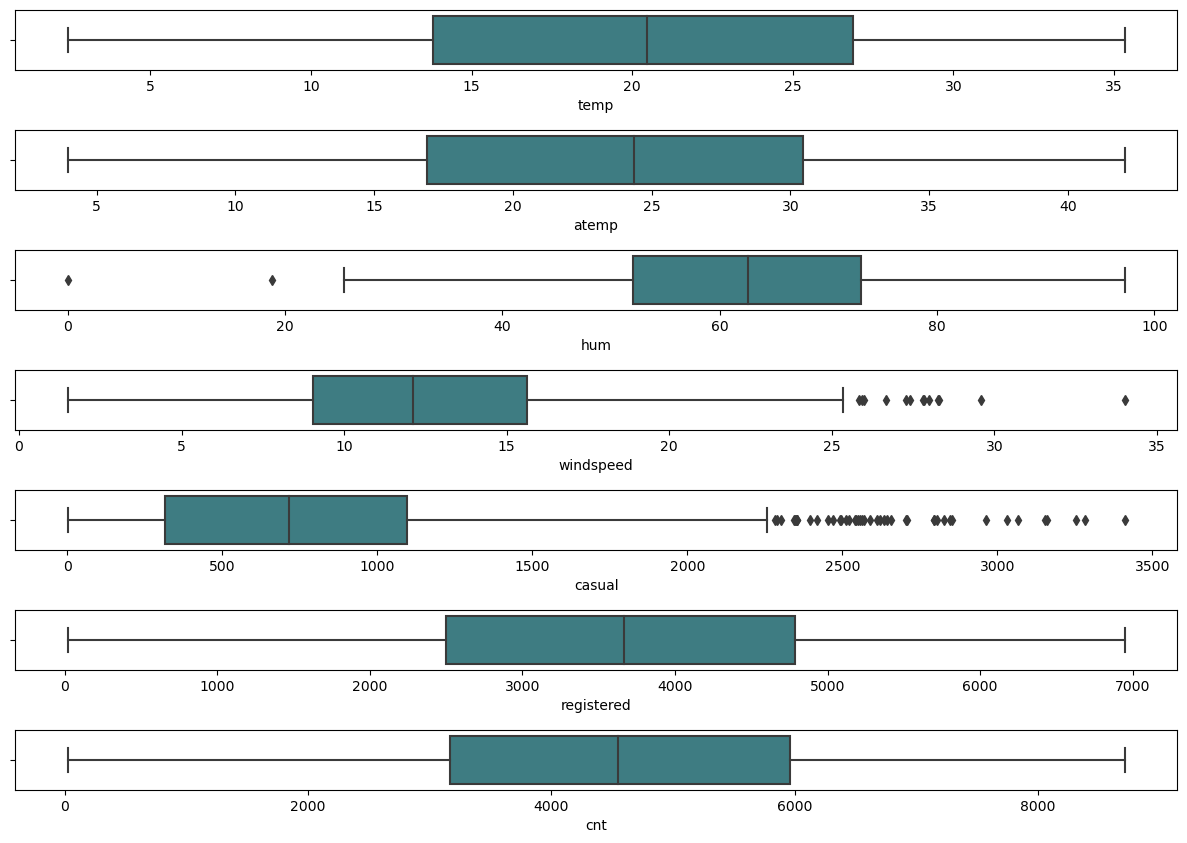

In [15]:
fig, axes = plt.subplots(nrows=7, ncols=1, figsize=(15, 10))
fig.subplots_adjust(hspace=1, bottom=0.1)
sns.boxplot(x= 'temp', data= bike, palette= 'crest', ax= axes[0])
sns.boxplot(x= 'atemp', data= bike, palette= 'crest', ax= axes[1])
sns.boxplot(x= 'hum', data=bike, palette= 'crest', ax= axes[2])
sns.boxplot(x= 'windspeed', data= bike, palette= 'crest', ax= axes[3])
sns.boxplot(x= 'casual', data= bike, palette= 'crest', ax= axes[4])
sns.boxplot(x= 'registered',data= bike, palette= 'crest',ax= axes[5])
sns.boxplot(x= 'cnt', data= bike, palette= 'crest', ax= axes[6])

Here we observe that hum, windspeed, casual has outliers

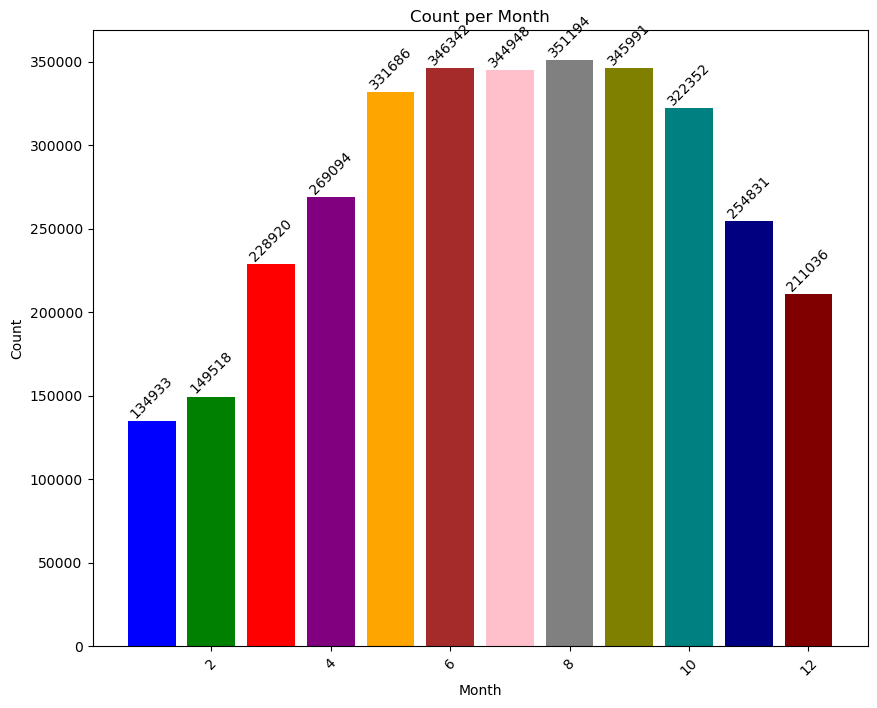

In [16]:
month_counts = bike.groupby('mnth')['cnt'].sum()

fig, ax = plt.subplots(figsize=[10,8])
bars = ax.bar(month_counts.index, month_counts.values, color=['blue', 'green', 'red', 'purple', 'orange', 'brown', 'pink', 'gray', 'olive', 'teal', 'navy', 'maroon'])
plt.xticks(rotation=45)
ax.set_xlabel('Month')
ax.set_ylabel('Count')
ax.set_title('Count per Month')

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height, str(int(height)), 
            ha='center', va='bottom', fontsize=10,rotation=45)
plt.show()


<AxesSubplot:xlabel='cnt', ylabel='registered'>

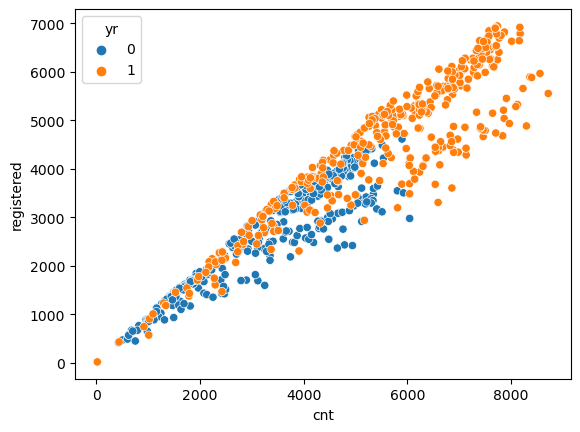

In [17]:
sns.scatterplot(data=bike, x='cnt', y='registered', hue='yr' )

THE ABOVE SCATTERPLOT DENOTES THAT DURING THE SECOND YEAR THE COUNTS HAS INCREASED IN COUNT

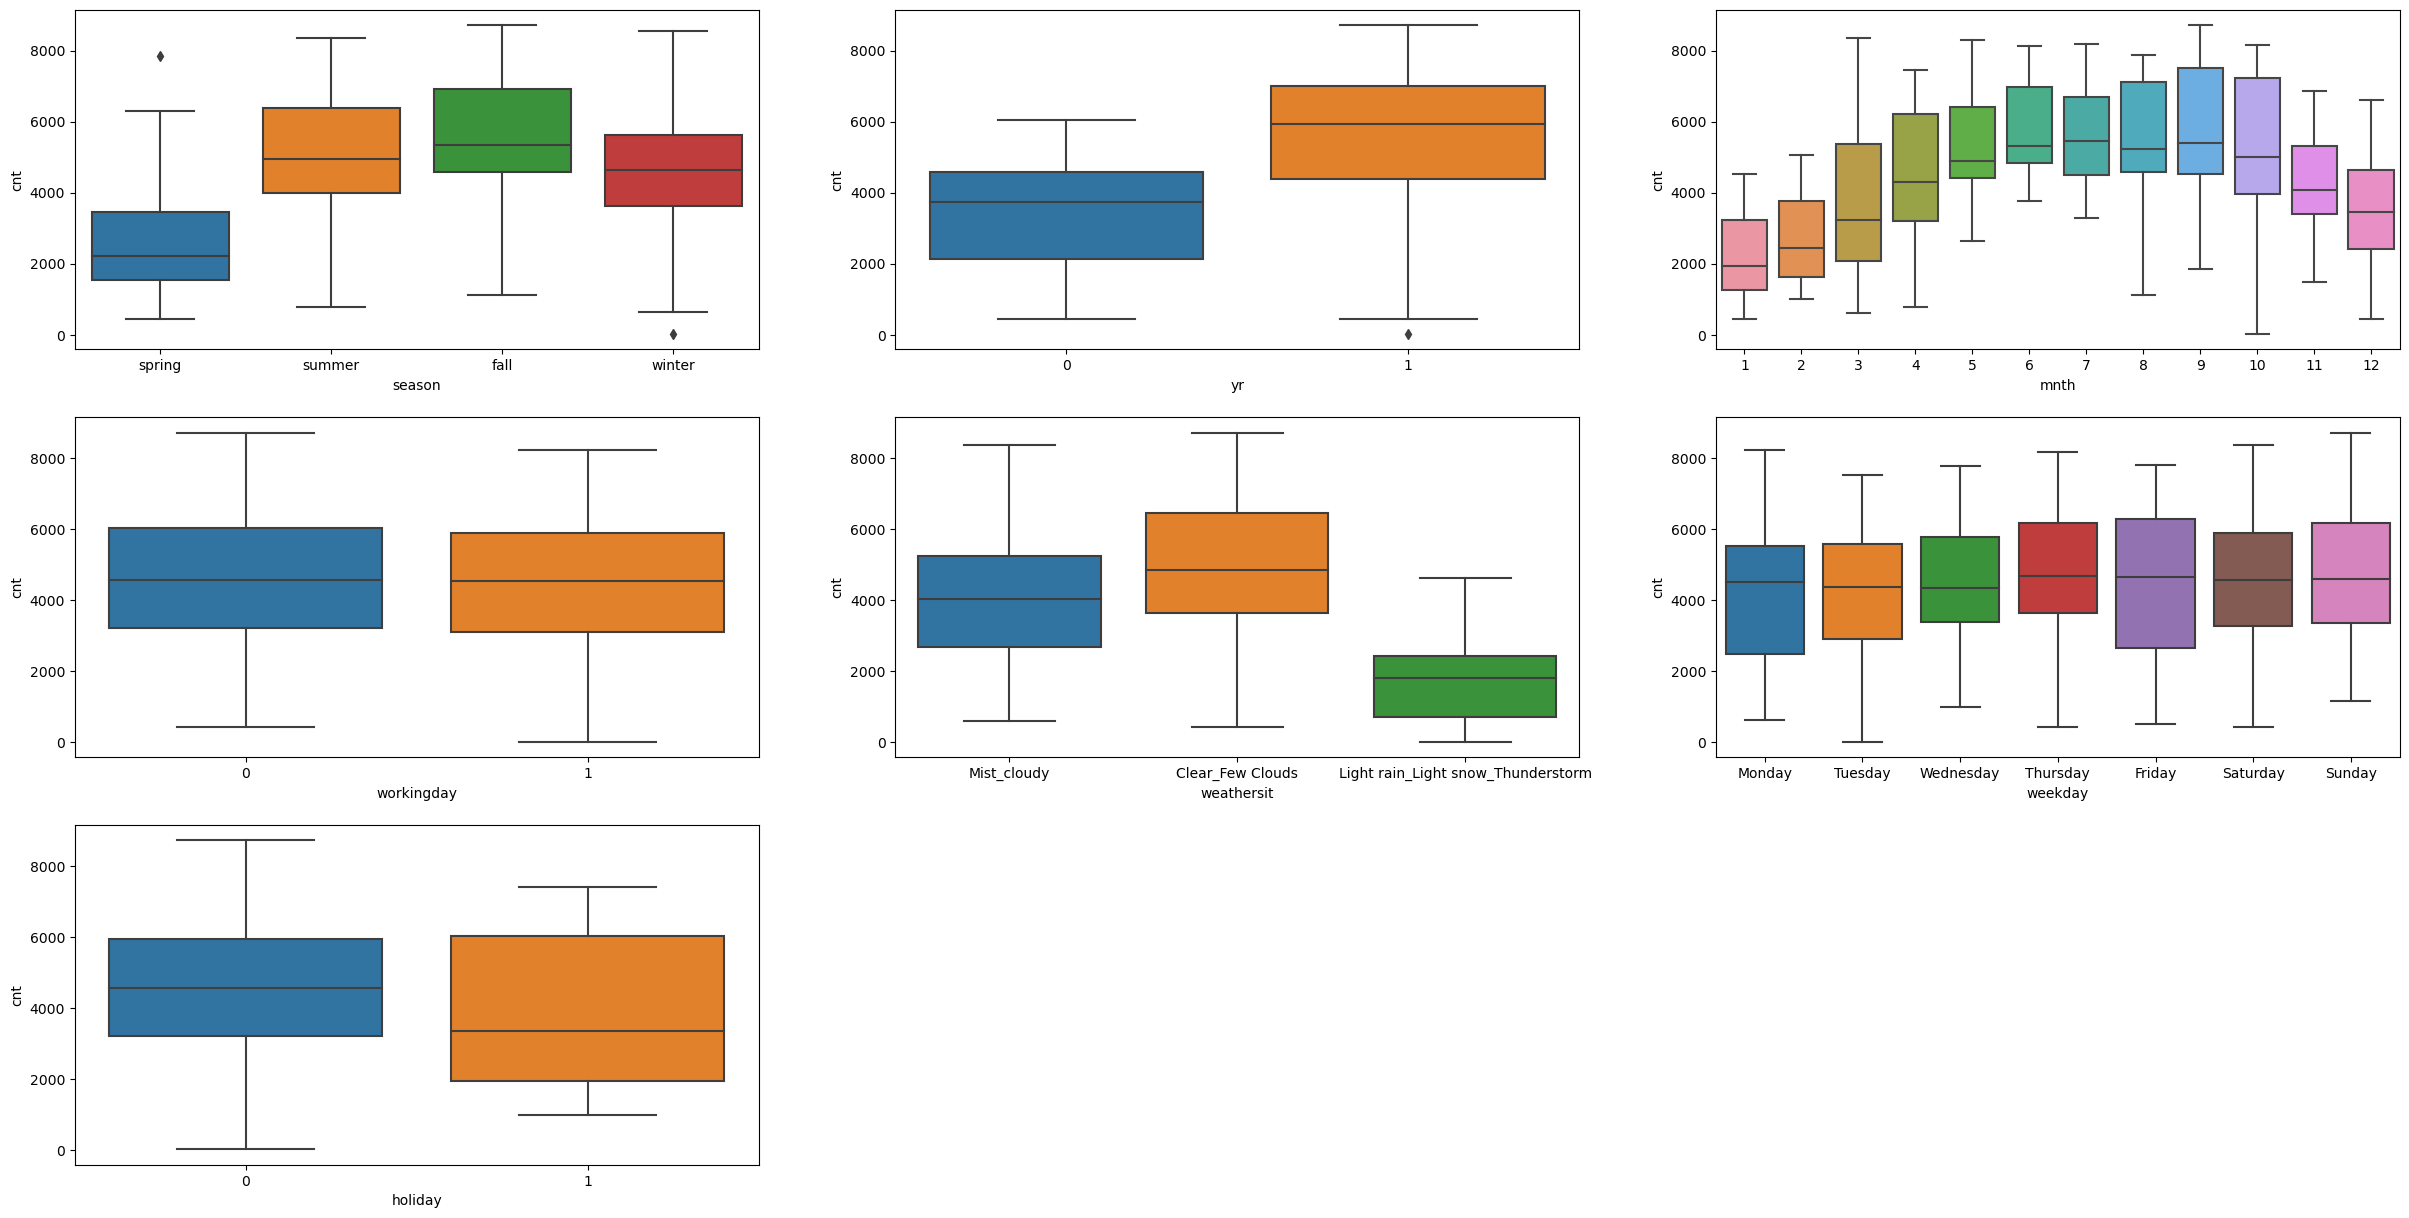

In [18]:
#Visualising categorical Variables to understand data better
plt.figure(figsize=(30, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)#yr','mnth','workingday','weathersit','weekday'
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(3,3,4)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.subplot(3,3,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(3,3,7)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.show()

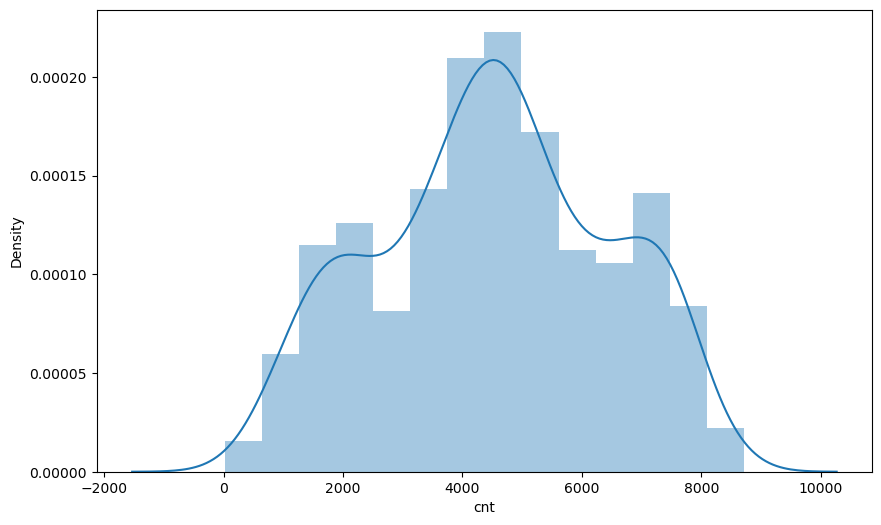

In [19]:
plt.figure(figsize=[10,6])
sns.distplot(bike["cnt"])
plt.show()

<AxesSubplot:xlabel='weekday'>

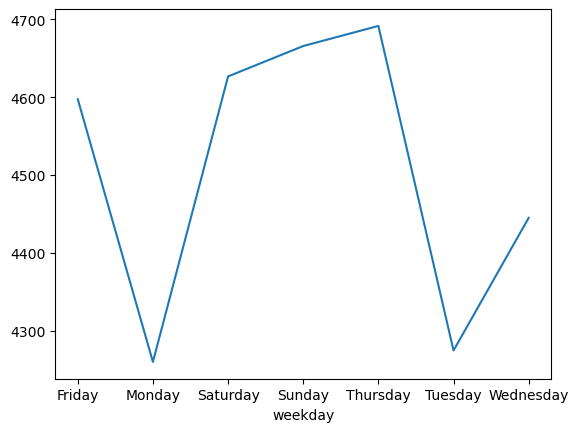

In [20]:
    week_count=bike.groupby("weekday")["cnt"].mean()
    week_count.plot()

FROM THE ABOVE PLOT WE UNDERSTAND THAT THERE IS MORE USAGE ON SUNDAYS AND COMPARITIVELY GOOD USE ON WEDNESDAYS AND THURSDAY

In [21]:
weekday_counts=bike.groupby('weekday')['cnt'].sum()
weekday_counts

weekday
Friday       478132
Monday       447281
Saturday     481176
Sunday       485235
Thursday     487923
Tuesday      448822
Wednesday    462276
Name: cnt, dtype: int64

THERE IS A DECREASE IN USAGE FOR THE FIRST 2 DAYS OF THE WEEK COMPARITIVELY .MONDAY AND TUESDAY RESPECTIVELY ,MOST USED DAY IN THE WEEK IS THURSDAY IN RANKING

## SINCE TEMP SHOWS HIGH CORRELATION WE WILL SEE HOW IT EFFECTS COUNT IN EACH MONTH

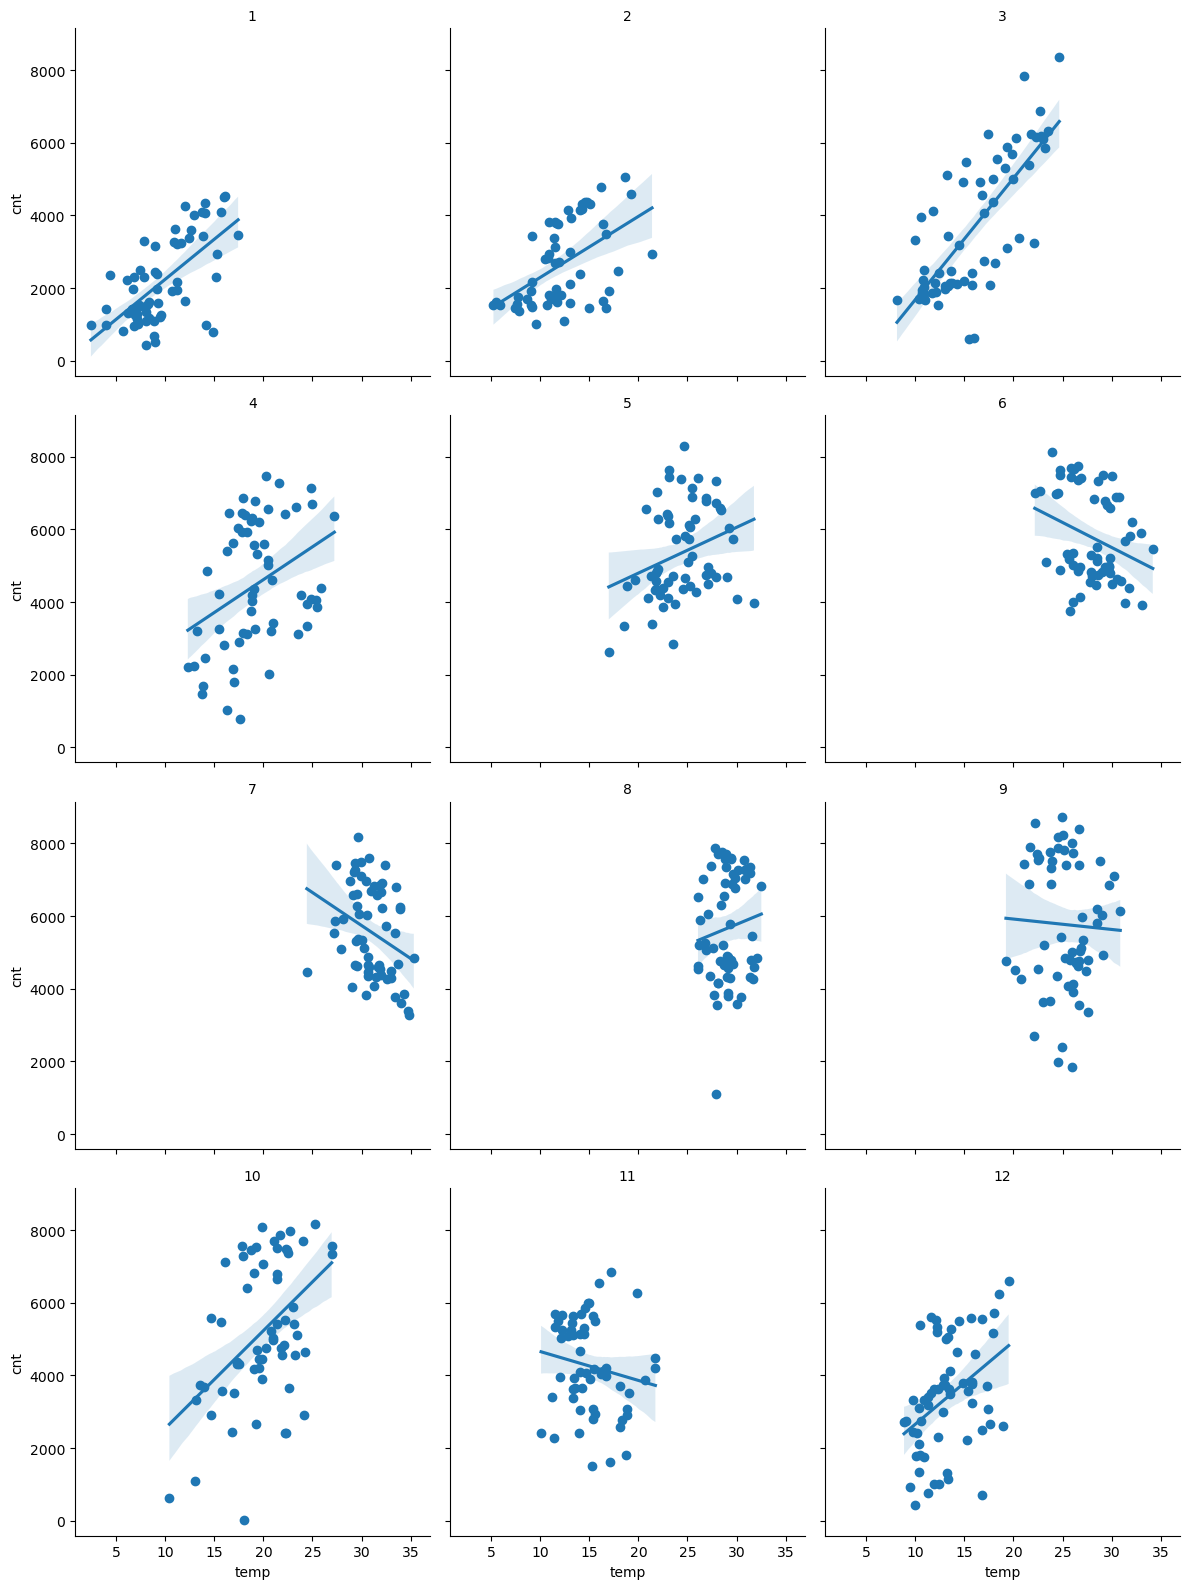

In [22]:
g = sns.FacetGrid(bike, col='mnth', col_wrap=3, height=4)
g.map(sns.regplot, 'temp', 'cnt', scatter_kws={'alpha':1})
g.set_titles('{col_name}')
plt.show()

We will see the seasonal trend

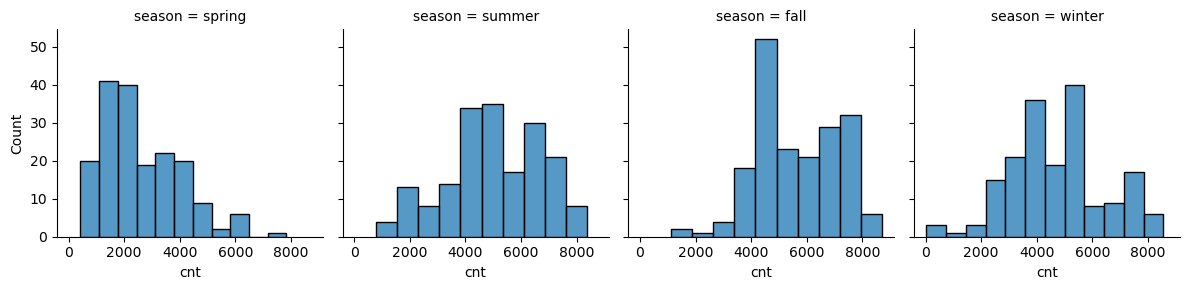

In [23]:
g=sns.FacetGrid(data=bike,col="season");
g.map(sns.histplot,"cnt")

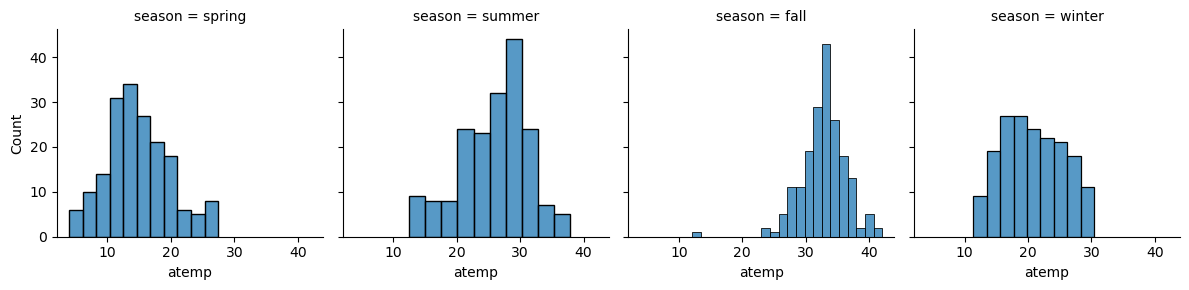

In [24]:
g=sns.FacetGrid(data=bike,col="season");
g.map(sns.histplot,"atemp")

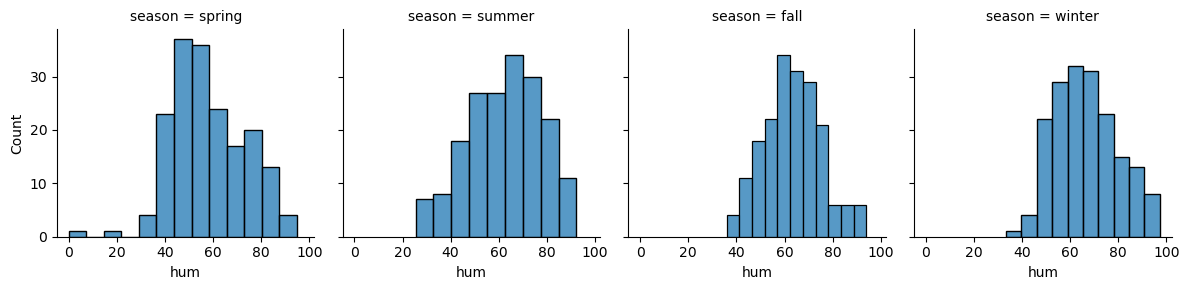

In [25]:
g=sns.FacetGrid(data=bike,col="season");
g.map(sns.histplot,"hum")

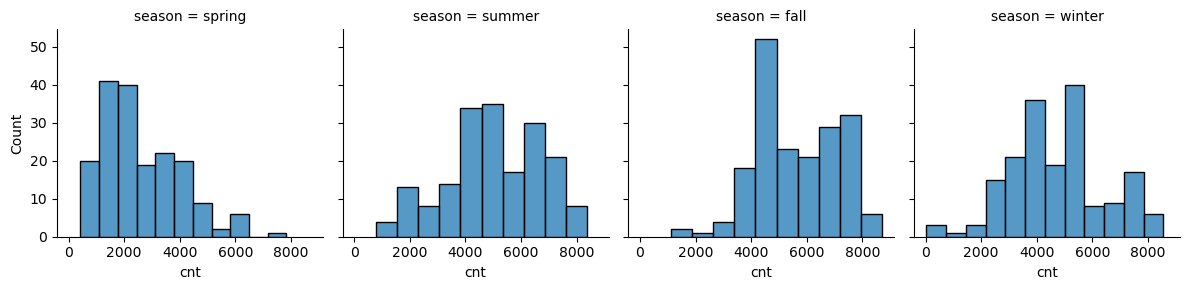

In [26]:
g=sns.FacetGrid(data=bike,col="season");
g.map_dataframe(sns.histplot,x="cnt")

## DURING THE SPRING AND SUMMER SEASON THE DISTRIBUTION IS VERY HIGH COMPARED TO THE OTHER TWO SEASONS
## FROM THE ABOVE VISUALISATIONS WE CAN CONCLUDE THAT CLIMATIC CONDITIONS PLAY A MAJOR ROLE IN INFLUENCING THE SUM USE OF BIKE.
## IN WARMER CONDITIONS THERE IS SIGNIFICANT INCREASE IN THE USE OF BIKES AND VISE VERSA IN COLD CONDITIONS


In [27]:
#CREATING DUMMY VARIABLES FOR CATEGORICAL DATA 

Season_condition=pd.get_dummies(bike['season'])
Weather_condition=pd.get_dummies(bike['weathersit'])
Day_of_week=pd.get_dummies(bike['weekday'])
Month=pd.get_dummies(bike['mnth'])

In [28]:
bike=pd.concat([bike,Season_condition],axis=1)
bike=pd.concat([bike,Weather_condition],axis=1)
bike=pd.concat([bike,Day_of_week],axis=1)
bike=pd.concat([bike,Month],axis=1)
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 41 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   dteday                              730 non-null    datetime64[ns]
 1   season                              730 non-null    object        
 2   yr                                  730 non-null    int64         
 3   mnth                                730 non-null    int64         
 4   holiday                             730 non-null    int64         
 5   weekday                             730 non-null    object        
 6   workingday                          730 non-null    int64         
 7   weathersit                          730 non-null    object        
 8   temp                                730 non-null    float64       
 9   atemp                               730 non-null    float64       
 10  hum                       

In [29]:
#Deleting the orginal columns season.weathersit,weekday,mnth
bike.drop(['season'],axis=1,inplace=True)
bike.drop(['weathersit'],axis=1,inplace=True)

bike.drop(['weekday'],axis=1,inplace=True)

bike.drop(['mnth'],axis=1,inplace=True)

bike.drop(['dteday'],axis=1,inplace=True)

bike.drop(['registered'],axis=1,inplace=True)

bike.drop(['casual'],axis=1,inplace=True)


bike.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,fall,spring,...,3,4,5,6,7,8,9,10,11,12
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,1,...,0,0,0,0,0,0,0,0,0,0


In [30]:
scaler= MinMaxScaler()

num_vars=['atemp','hum','windspeed','cnt']
bike[num_vars] = scaler.fit_transform(bike[num_vars])

In [31]:
bike

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,fall,spring,...,3,4,5,6,7,8,9,10,11,12
0,0,0,1,14.110847,0.373517,0.828620,0.284606,0.110792,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,14.902598,0.360541,0.715771,0.466215,0.089623,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,8.050924,0.144830,0.449638,0.465740,0.152669,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,8.200000,0.174649,0.607131,0.284297,0.177174,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,9.305237,0.197158,0.449313,0.339143,0.181546,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,1,10.420847,0.193709,0.671380,0.675656,0.240681,0,1,...,0,0,0,0,0,0,0,0,0,1
726,1,0,0,10.386653,0.230993,0.606684,0.274350,0.353543,0,1,...,0,0,0,0,0,0,0,0,0,1
727,1,0,0,10.386653,0.214393,0.774208,0.210260,0.151749,0,1,...,0,0,0,0,0,0,0,0,0,1
728,1,0,1,10.489153,0.200348,0.497001,0.676936,0.204096,0,1,...,0,0,0,0,0,0,0,0,0,1


In [32]:
X= bike.drop("cnt", axis=1)
Y= bike["cnt"]

x_train, x_test, y_train, y_test= train_test_split(X, Y,test_size=0.3 ,random_state=0)

In [33]:
#USING RFE APPROACH FOR FEATURE SELECTION
# WE START WITH 15 VARS AND WILL USE MIXED APPROACH TO BUILD A MODEL

LM = LinearRegression()
LM.fit(x_train, y_train)

rfe = RFE(LM, n_features_to_select=15)            
rfe = rfe.fit(x_train, y_train)

## Recursive feature elimination (RFE) is a feature selection method that fits a model and removes the weakest feature (or features) until the specified number of features is reached.

In [34]:
col = x_train.columns[rfe.support_]
col

Index([                                'yr',
                                  'holiday',
                                    'atemp',
                                      'hum',
                                'windspeed',
                                   'spring',
                                   'winter',
       'Light rain_Light snow_Thunderstorm',
                                          1,
                                          2,
                                          5,
                                          7,
                                          9,
                                         11,
                                         12],
      dtype='object')

In [35]:
x_train= x_train[col]
x_test= x_test[col]

In [36]:
x_train

,yr,holiday,atemp,hum,windspeed,spring,winter,Light rain_Light snow_Thunderstorm,1,2,5,7,9,11,12
235,0,0,0.724079,0.622108,0.475634,0,0,0,0,0,0,0,0,0,0
524,1,0,0.747280,0.449443,0.251294,0,0,0,0,0,0,0,0,0,0
12,0,0,0.094265,0.483719,0.574366,1,0,0,1,0,0,0,0,0,0
161,0,0,0.786227,0.673093,0.273070,0,0,0,0,0,0,0,0,0,0
556,1,0,0.749779,0.651242,0.266644,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,1,0,0.408330,0.931020,0.279512,0,1,0,0,0,0,0,0,0,1
192,0,0,0.866609,0.574979,0.366672,0,0,0,0,0,0,1,0,0,0
629,1,0,0.697558,0.664953,0.538460,0,0,0,0,0,0,0,1,0,0
559,1,0,0.770481,0.718938,0.250040,0,0,0,0,0,0,1,0,0,0


In [37]:
x_train1 = sm.add_constant(x_train)

LM = sm.OLS(y_train,x_train1).fit()

In [38]:
print(LM.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     156.5
Date:                Sun, 14 May 2023   Prob (F-statistic):          7.92e-177
Time:                        12:58:46   Log-Likelihood:                 502.94
No. Observations:                 511   AIC:                            -973.9
Df Residuals:                     495   BIC:                            -906.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [39]:
vif = pd.DataFrame()
X = x_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,18.14
2,atemp,14.38
4,windspeed,4.87
5,spring,4.53
6,winter,2.99
8,1,2.36
0,yr,2.06
9,2,2.06
13,11,1.83
14,12,1.64


In [40]:
#COLUMN Humidity HAS A VERY HIGH VIF SO WE DROP IT
x_train=x_train1.drop(['hum'],axis=1)

In [41]:
x_train1 = sm.add_constant(x_train)

In [42]:
LM1 = sm.OLS(y_train,x_train1).fit()

In [43]:
print(LM1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     139.3
Date:                Sun, 14 May 2023   Prob (F-statistic):          1.24e-161
Time:                        12:58:46   Log-Likelihood:                 464.02
No. Observations:                 511   AIC:                            -898.0
Df Residuals:                     496   BIC:                            -834.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [44]:
vif = pd.DataFrame()
X = x_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,44.16
5,spring,3.91
3,atemp,3.50
6,winter,2.36
8,1,2.28
9,2,1.94
13,11,1.77
14,12,1.57
11,7,1.35
10,5,1.19


In [45]:
#COLUMN const HAS A VERY HIGH VIF SO WE DROP IT
x_train=x_train1.drop(['const'],axis=1)

In [46]:
x_train1 = sm.add_constant(x_train)

In [47]:
LM2 = sm.OLS(y_train,x_train1).fit()

In [48]:
print(LM2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     139.3
Date:                Sun, 14 May 2023   Prob (F-statistic):          1.24e-161
Time:                        12:58:47   Log-Likelihood:                 464.02
No. Observations:                 511   AIC:                            -898.0
Df Residuals:                     496   BIC:                            -834.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [49]:
vif = pd.DataFrame()
X = x_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,5.42
3,windspeed,4.72
4,spring,4.09
5,winter,2.57
7,1,2.27
0,yr,2.06
8,2,2.05
12,11,1.81
13,12,1.55
10,7,1.43


In [50]:
#COLUMN atemp HAS A VERY HIGH VIF SO WE DROP IT
x_train=x_train1.drop(['atemp'],axis=1)

In [51]:
x_train1 = sm.add_constant(x_train)

In [52]:
LM3 = sm.OLS(y_train,x_train1).fit()

In [53]:
print(LM3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     109.7
Date:                Sun, 14 May 2023   Prob (F-statistic):          9.82e-137
Time:                        12:58:47   Log-Likelihood:                 402.07
No. Observations:                 511   AIC:                            -776.1
Df Residuals:                     497   BIC:                            -716.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [54]:
vif = pd.DataFrame()
X = x_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,10.37
4,spring,3.18
5,winter,2.16
7,1,2.04
8,2,1.89
12,11,1.63
13,12,1.42
9,5,1.19
10,7,1.18
11,9,1.12


In [55]:
#COLUMN const HAS A VERY HIGH VIF SO WE DROP IT
x_train=x_train1.drop(['const'],axis=1)

In [56]:
x_train1 = sm.add_constant(x_train)

In [57]:
LM4 = sm.OLS(y_train,x_train1).fit()

In [58]:
print(LM4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     109.7
Date:                Sun, 14 May 2023   Prob (F-statistic):          9.82e-137
Time:                        12:58:47   Log-Likelihood:                 402.07
No. Observations:                 511   AIC:                            -776.1
Df Residuals:                     497   BIC:                            -716.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [59]:
vif = pd.DataFrame()
X = x_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,spring,4.07
2,windspeed,2.64
4,winter,2.50
6,1,2.23
7,2,2.04
0,yr,1.81
11,11,1.77
12,12,1.54
8,5,1.16
10,9,1.14


In [60]:
y_pred = LM4.predict(x_train1)

Normality of error terms

Text(0.5, 0, 'Errors')

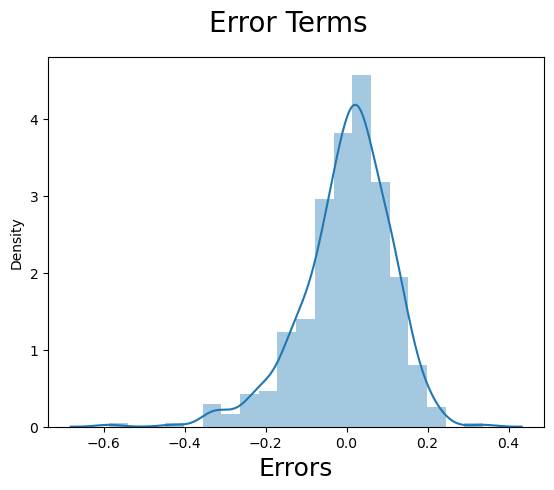

In [61]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

## Homoscedasticity

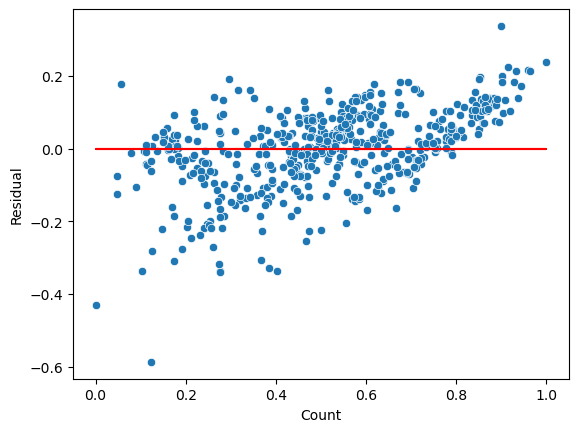

In [62]:
y_pred = LM4.predict(x_train1)
residual = y_train - y_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

No visible pattern observed from above plot for residuals.

Independence of residuals

Durbin-Watson value of final model LM4 is 1.994, which signifies there is no autocorrelation.

In [78]:
#getting the y_train_pred
y_train_pred = LM4.predict(x_train1)

In [81]:
#dropping constant
x_train1.drop(columns= 'const', inplace = True)

In [82]:
#creating new X_test dataset based on the feature variables using RFE
x_test_new = x_test[x_train1.columns]

#adding a constant variable
x_test_new = sm.add_constant(x_test_new)#creating new X_test dataset based on the feature variables using RFE
x_test_new = x_test[x_train1.columns]

#adding a constant variable
x_test_new = sm.add_constant(x_test_new)

In [86]:
#making predictions
y_pred = LM4.predict(x_test_new)

In [87]:
#finding out the mean squared error 

train_mse = (mean_squared_error(y_true=y_train, y_pred=y_train_pred))
test_mse = (mean_squared_error(y_true=y_test, y_pred=y_pred))
print('Mean squared error of the train set is', train_mse)
print('Mean squared error of the test set is', test_mse)

Mean squared error of the train set is 0.012136460466356627
Mean squared error of the test set is 0.011531342604002917


Since our model's mean squared error is almost 0, it implies that our model accurately predicts the variance between in both the test and train datasets

In [88]:
#r2 score of the test set
r2_test = r2_score(y_true=y_test, y_pred=y_pred)
print('r2 score on the test set is', r2_test)

r2 score on the test set is 0.7923266209013525


In [89]:
#r2 score of the training set
r2_train = r2_score(y_true=y_train, y_pred= y_train_pred)
print('r2 score on the train set is', r2_train)

r2 score on the train set is 0.7415946280131811
